# **BERT Training**

In [1]:
!pip install transformers datasets

In [2]:
from datasets import load_dataset

dataset = load_dataset("imdb")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
train_dataset = dataset['train'].shuffle(seed=42).select(range(2000))
test_dataset = dataset['test'].shuffle(seed=42).select(range(2000))

In [6]:
type(train_dataset)

datasets.arrow_dataset.Dataset

In [7]:
train_dataset[0]['text']

'There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier\'s plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it\'s the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...'

In [8]:
train_dataset[0]['label']

1

In [9]:
from collections import Counter
Counter([train_dataset[i]['label'] for i in range(len(train_dataset))])

Counter({1: 1000, 0: 1000})

### **Balanced Dataset**

In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [11]:
dir(tokenizer)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_call_one',
 '_convert_encoding',
 '_convert_id_to_token',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strategies',
 '_in_target_context_manager',
 '_pad',
 '_pad_token_type_id',
 '_processor_class',
 '_save_pretrained',
 '

In [12]:
print("Vocab Size:", tokenizer.vocab_size)
print("Pad Token:", tokenizer.pad_token)
print("CLS Token:", tokenizer.cls_token)
print("SEP Token:", tokenizer.sep_token)
print("Model Max Length:", tokenizer.model_max_length)

Vocab Size: 30522
Pad Token: [PAD]
CLS Token: [CLS]
SEP Token: [SEP]
Model Max Length: 512


In [13]:
token_lengths = [len(tokenizer(text, truncation=False)['input_ids']) for text in train_dataset['text']]
print("Max:", max(token_lengths), "Average:", sum(token_lengths)/len(token_lengths))

Token indices sequence length is longer than the specified maximum sequence length for this model (936 > 512). Running this sequence through the model will result in indexing errors


Max: 1416 Average: 306.515


### **Set Max Length**

In [14]:
def tokenize(batch):
    return tokenizer(
        batch['text'],
        padding='max_length',
        truncation=True,
        max_length=256)

In [15]:
train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [16]:
type(train_dataset)

datasets.arrow_dataset.Dataset

In [17]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [18]:
print(train_dataset[0]['attention_mask'])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
print(len(train_dataset[0]['input_ids']))

256


In [20]:
set(train_dataset['label'])

{0, 1}

In [21]:
train_dataset.set_format(
    type='torch',
    columns=['input_ids', 'attention_mask', 'label']
)

test_dataset.set_format(
    type='torch',
    columns=['input_ids', 'attention_mask', 'label']
)

In [22]:
train_dataset[0]

{'label': tensor(1),
 'input_ids': tensor([  101,  2045,  2003,  2053,  7189,  2012,  2035,  2090,  3481,  3771,
          1998,  6337,  2099,  2021,  1996,  2755,  2008,  2119,  2024,  2610,
          2186,  2055,  6355,  6997,  1012,  6337,  2099,  3504, 15594,  2100,
          1010,  3481,  3771,  3504,  4438,  1012,  6337,  2099, 14811,  2024,
          3243,  3722,  1012,  3481,  3771,  1005,  1055,  5436,  2024,  2521,
          2062,  8552,  1012,  1012,  1012,  3481,  3771,  3504,  2062,  2066,
          3539,  8343,  1010,  2065,  2057,  2031,  2000,  3962, 12319,  1012,
          1012,  1012,  1996,  2364,  2839,  2003,  5410,  1998,  6881,  2080,
          1010,  2021,  2031,  1000, 17936,  6767,  7054,  3401,  1000,  1012,
          2111,  2066,  2000, 12826,  1010,  2000,  3648,  1010,  2000, 16157,
          1012,  2129,  2055,  2074,  9107,  1029,  6057,  2518,  2205,  1010,
          2111,  3015,  3481,  3771,  3504,  2137,  2021,  1010,  2006,  1996,
          2060,  2

In [23]:
len(test_dataset)

2000

In [24]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [25]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2  # Positive/Negative
).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
texts = [
    "I loved this movie!",
    "This was awful.",
    "Amazing storyline and acting.",
    "I hate everything about this.",
    "What a beautiful film!",
    "Terrible direction.",
    "Absolutely fantastic experience!",
    "Super boring.",
    "One of the best movies ever.",
    "I will never watch this again.",
    "Loved every moment of it.",
    "Waste of time.",
    "Great visuals and music.",
    "The plot was predictable.",
    "Outstanding performance!"
]

In [27]:
model.eval()
inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    for text, pred in zip(texts, preds):
        print(f"Text: {text} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Text: I loved this movie! --> Sentiment: Negative
Text: This was awful. --> Sentiment: Negative
Text: Amazing storyline and acting. --> Sentiment: Negative
Text: I hate everything about this. --> Sentiment: Negative
Text: What a beautiful film! --> Sentiment: Negative
Text: Terrible direction. --> Sentiment: Negative
Text: Absolutely fantastic experience! --> Sentiment: Negative
Text: Super boring. --> Sentiment: Negative
Text: One of the best movies ever. --> Sentiment: Negative
Text: I will never watch this again. --> Sentiment: Negative
Text: Loved every moment of it. --> Sentiment: Negative
Text: Waste of time. --> Sentiment: Negative
Text: Great visuals and music. --> Sentiment: Negative
Text: The plot was predictable. --> Sentiment: Negative
Text: Outstanding performance! --> Sentiment: Negative


In [28]:
device

device(type='cuda')

In [29]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [30]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = CrossEntropyLoss()

In [31]:
from sklearn.metrics import accuracy_score

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Test Accuracy: {acc:.4f}")

Epoch 1, Train Loss: 0.4922, Test Accuracy: 0.8655
Epoch 2, Train Loss: 0.2482, Test Accuracy: 0.8805
Epoch 3, Train Loss: 0.1296, Test Accuracy: 0.8635
Epoch 4, Train Loss: 0.0649, Test Accuracy: 0.8675
Epoch 5, Train Loss: 0.0598, Test Accuracy: 0.8690


**Train Time: GPU : 5 mins, CPU: 25 mins**

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(all_labels, all_preds)
print(acc*100)

86.9


In [35]:
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1000
           1       0.91      0.82      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [37]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# F1-score (macro and weighted)
f1_macro = f1_score(all_labels, all_preds, average='macro')
f1_weighted = f1_score(all_labels, all_preds, average='weighted')

print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

all_probs = [float(p) for p in all_preds]

F1-Score (Macro): 0.8687
F1-Score (Weighted): 0.8687


ROC-AUC: 0.8690


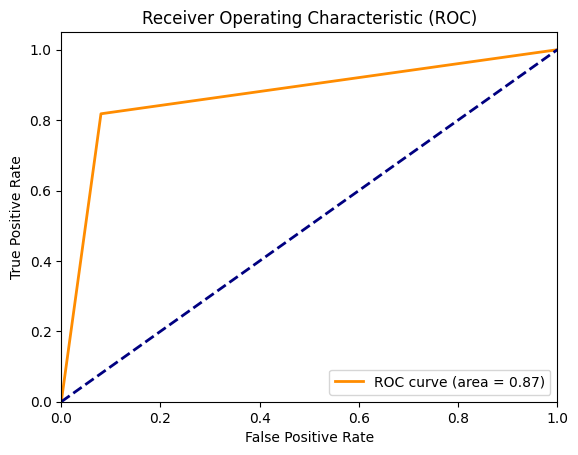

In [38]:
# ROC-AUC Score
roc_auc = roc_auc_score(all_labels, all_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [39]:
model.eval()
inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    for text, pred in zip(texts, preds):
        print(f"Text: {text} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Text: I loved this movie! --> Sentiment: Positive
Text: This was awful. --> Sentiment: Negative
Text: Amazing storyline and acting. --> Sentiment: Positive
Text: I hate everything about this. --> Sentiment: Negative
Text: What a beautiful film! --> Sentiment: Positive
Text: Terrible direction. --> Sentiment: Negative
Text: Absolutely fantastic experience! --> Sentiment: Positive
Text: Super boring. --> Sentiment: Negative
Text: One of the best movies ever. --> Sentiment: Positive
Text: I will never watch this again. --> Sentiment: Negative
Text: Loved every moment of it. --> Sentiment: Positive
Text: Waste of time. --> Sentiment: Negative
Text: Great visuals and music. --> Sentiment: Positive
Text: The plot was predictable. --> Sentiment: Negative
Text: Outstanding performance! --> Sentiment: Positive


In [40]:
model.save_pretrained("SentimentModel-V1.0")
tokenizer.save_pretrained("SentimentModel-V1.0")

('SentimentModel-V1.0/tokenizer_config.json',
 'SentimentModel-V1.0/special_tokens_map.json',
 'SentimentModel-V1.0/vocab.txt',
 'SentimentModel-V1.0/added_tokens.json',
 'SentimentModel-V1.0/tokenizer.json')

# **Push Custom-Trained Model To HF**

In [41]:
!pip install huggingface_hub

In [42]:
from huggingface_hub import login
login()

In [43]:
model.config.id2label = {0: "Negative", 1: "Positive"}
model.config.label2id = {"Negative": 0, "Positive": 1}

In [44]:
model.save_pretrained("SentimentModel-V1.0")
tokenizer.save_pretrained("SentimentModel-V1.0")

('SentimentModel-V1.0/tokenizer_config.json',
 'SentimentModel-V1.0/special_tokens_map.json',
 'SentimentModel-V1.0/vocab.txt',
 'SentimentModel-V1.0/added_tokens.json',
 'SentimentModel-V1.0/tokenizer.json')

In [45]:
from huggingface_hub import HfApi, HfFolder, Repository

model.push_to_hub("SentimentModel-V1.0")
tokenizer.push_to_hub("SentimentModel-V1.0")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...el-V1.0/model.safetensors:   0%|          |  575kB /  268MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/omkarwazulkar/SentimentModel-V1.0/commit/e22c6af6d4a719e676f2335daefe2fa8bc4ce6be', commit_message='Upload tokenizer', commit_description='', oid='e22c6af6d4a719e676f2335daefe2fa8bc4ce6be', pr_url=None, repo_url=RepoUrl('https://huggingface.co/omkarwazulkar/SentimentModel-V1.0', endpoint='https://huggingface.co', repo_type='model', repo_id='omkarwazulkar/SentimentModel-V1.0'), pr_revision=None, pr_num=None)

# **K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset
import torch
import numpy as np
from sklearn.metrics import accuracy_score

k = 5  # number of folds
batch_size = 16

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

fold_results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(train_dataset)):
    print(f"\n----- FOLD {fold+1} / {k} -----")

    # Create subsets for this fold
    train_subset = Subset(train_dataset, train_idx)
    val_subset   = Subset(train_dataset, val_idx)

    # Create dataloaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_subset, batch_size=batch_size)

    # Recreate model, optimizer, loss function for each fold
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
    criterion = torch.nn.CrossEntropyLoss()

    epochs = 3  # choose what you want

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Fold {fold+1}, Epoch {epoch+1}, Train Loss: {avg_loss:.4f}")

    # Validation for this fold
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    fold_acc = accuracy_score(all_labels, all_preds)
    fold_results.append(fold_acc)

    print(f"Fold {fold+1} Accuracy: {fold_acc:.4f}")

# Final averaged accuracy
print("\n===== FINAL CROSS-VALIDATION RESULT =====")
print("Accuracies:", fold_results)
print("Mean Accuracy:", np.mean(fold_results))

# **Loading Custom-Trained HF Model**

In [1]:
!pip install huggingface_hub transformers

In [2]:
from huggingface_hub import login
login()

In [4]:
texts = [
    "I loved this movie!",
    "This was awful.",
    "Amazing storyline and acting.",
    "I hate everything about this.",
    "What a beautiful film!",
    "Terrible direction.",
    "Absolutely fantastic experience!",
    "Super boring.",
    "One of the best movies ever.",
    "I will never watch this again.",
    "Loved every moment of it.",
    "Waste of time.",
    "Great visuals and music.",
    "The plot was predictable.",
    "Outstanding performance!"
]

### **One Way: Pipeline**

In [5]:
from transformers import pipeline

pipe = pipeline("text-classification", model="omkarwazulkar/SentimentModel-V1.0")

config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [6]:
results = pipe(texts)

for text, res in zip(texts, results):
    print(f"Text: {text}")
    print(f"Prediction: {res}\n")

Text: I loved this movie!
Prediction: {'label': 'Positive', 'score': 0.9849874377250671}

Text: This was awful.
Prediction: {'label': 'Negative', 'score': 0.9887012243270874}

Text: Amazing storyline and acting.
Prediction: {'label': 'Positive', 'score': 0.9912294149398804}

Text: I hate everything about this.
Prediction: {'label': 'Negative', 'score': 0.9649316072463989}

Text: What a beautiful film!
Prediction: {'label': 'Positive', 'score': 0.9879246950149536}

Text: Terrible direction.
Prediction: {'label': 'Negative', 'score': 0.9794458746910095}

Text: Absolutely fantastic experience!
Prediction: {'label': 'Positive', 'score': 0.9856595993041992}

Text: Super boring.
Prediction: {'label': 'Negative', 'score': 0.94926917552948}

Text: One of the best movies ever.
Prediction: {'label': 'Positive', 'score': 0.989541232585907}

Text: I will never watch this again.
Prediction: {'label': 'Negative', 'score': 0.7853710055351257}

Text: Loved every moment of it.
Prediction: {'label': 'Po

### **Other Way: Directly**

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("omkarwazulkar/SentimentModel-V1.0")
_model = AutoModelForSequenceClassification.from_pretrained("omkarwazulkar/SentimentModel-V1.0")

In [9]:
_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [10]:
import torch

# Tokenize
inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = _model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    for text, pred in zip(texts, preds):
      print(f"Text: {text} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Text: I loved this movie! --> Sentiment: Positive
Text: This was awful. --> Sentiment: Negative
Text: Amazing storyline and acting. --> Sentiment: Positive
Text: I hate everything about this. --> Sentiment: Negative
Text: What a beautiful film! --> Sentiment: Positive
Text: Terrible direction. --> Sentiment: Negative
Text: Absolutely fantastic experience! --> Sentiment: Positive
Text: Super boring. --> Sentiment: Negative
Text: One of the best movies ever. --> Sentiment: Positive
Text: I will never watch this again. --> Sentiment: Negative
Text: Loved every moment of it. --> Sentiment: Positive
Text: Waste of time. --> Sentiment: Negative
Text: Great visuals and music. --> Sentiment: Positive
Text: The plot was predictable. --> Sentiment: Negative
Text: Outstanding performance! --> Sentiment: Positive


# **ONNX Runtime Optimization Pipeline / ONNX Export+ ONNX Runtime Inference**

In [24]:
!pip install transformers optimum[onnxruntime]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformer

In [1]:
from optimum.onnxruntime import ORTModelForSequenceClassification
from transformers import AutoTokenizer
from pathlib import Path

model_name = "omkarwazulkar/SentimentModel-V1.0"
save_path = Path("Sentiment-OnnxModel-V1.0")

# 1. Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 2. Export ONNX model (new API!)
onnx_model = ORTModelForSequenceClassification.from_pretrained(
    model_name,
    export=True  # <-- Export ONNX
)

# 3. Save model + tokenizer
onnx_model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

Multiple distributions found for package optimum. Picked distribution: optimum-onnx
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/modeling_attn_mask_utils.py:196: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  inverte

('Sentiment-OnnxModel-V1.0/tokenizer_config.json',
 'Sentiment-OnnxModel-V1.0/special_tokens_map.json',
 'Sentiment-OnnxModel-V1.0/vocab.txt',
 'Sentiment-OnnxModel-V1.0/added_tokens.json',
 'Sentiment-OnnxModel-V1.0/tokenizer.json')

In [2]:
import onnxruntime as ort
from transformers import AutoTokenizer
import numpy as np

onnx_folder = "Sentiment-OnnxModel-V1.0"   # the folder you saved earlier

tokenizer = AutoTokenizer.from_pretrained(onnx_folder)
session = ort.InferenceSession(f"{onnx_folder}/model.onnx")

In [3]:
def predict(text):
    inputs = tokenizer(
        text,
        return_tensors="np",
        padding=True,
        truncation=True,
        max_length=256
    )

    outputs = session.run(
        None,
        {
            "input_ids": inputs["input_ids"],
            "attention_mask": inputs["attention_mask"]
        }
    )

    logits = outputs[0]
    pred_id = int(np.argmax(logits, axis=1)[0])
    return pred_id, logits

In [25]:
id2label = {0: "Negative", 1: "Positive"}

In [5]:
text = "I really hate this movie!"
pred_id, _ = predict(text)
print("Prediction:", id2label[pred_id])

Prediction: Negative


In [6]:
texts = [
    "I loved this movie!",
    "This was awful.",
    "Amazing storyline and acting.",
    "I hate everything about this.",
    "What a beautiful film!",
    "Terrible direction.",
    "Absolutely fantastic experience!",
    "Super boring.",
    "One of the best movies ever.",
    "I will never watch this again.",
    "Loved every moment of it.",
    "Waste of time.",
    "Great visuals and music.",
    "The plot was predictable.",
    "Outstanding performance!"
]

In [7]:
import numpy as np

def predict_batch(texts):
    inputs = tokenizer(
        texts,
        return_tensors="np",
        padding=True,
        truncation=True,
        max_length=256
    )

    outputs = session.run(
        None,
        {
            "input_ids": inputs["input_ids"],
            "attention_mask": inputs["attention_mask"]
        }
    )

    logits = outputs[0]
    preds = np.argmax(logits, axis=1)
    return preds, logits

In [ ]:
pred_ids, logits = predict_batch(texts)

for text, pred in zip(texts, pred_ids):
    print(f"Text: {text}\nPrediction: {id2label[pred]}\n")

In [9]:
from onnxruntime.quantization import quantize_dynamic, QuantType

model_fp32 = "Sentiment-OnnxModel-V1.0/model.onnx"
model_int8 = "Sentiment-OnnxModel-V1.0/model-int8.onnx"

quantize_dynamic(
    model_fp32,
    model_int8,
    weight_type=QuantType.QInt8
)

print("Quantization Completed!")

Quantization Completed!


In [10]:
tokenizer = AutoTokenizer.from_pretrained(onnx_folder)
session = ort.InferenceSession(f"{onnx_folder}/model-int8.onnx")

In [15]:
demo_text = ["I love this movie"]

In [18]:
inputs = tokenizer(demo_text, return_tensors="np", padding=True, truncation=True, max_length=256)
inputs

{'input_ids': array([[ 101, 1045, 2293, 2023, 3185,  102]]), 'attention_mask': array([[1, 1, 1, 1, 1, 1]])}

In [19]:
outputs = session.run(
    None,
    {
         "input_ids": inputs['input_ids'],
         "attention_mask": inputs['attention_mask']
    }
)

In [21]:
logits = outputs[0]
logits

array([[-2.3525715,  2.045408 ]], dtype=float32)

In [38]:
preds = np.argmax(logits, axis=1)[0]
preds

np.int64(1)

In [39]:
id2label[int(preds)]

'Positive'

In [40]:
!zip -r Sentiment-OnnxModel-V1.0.zip Sentiment-OnnxModel-V1.0/

  adding: Sentiment-OnnxModel-V1.0/ (stored 0%)
  adding: Sentiment-OnnxModel-V1.0/tokenizer_config.json (deflated 73%)
  adding: Sentiment-OnnxModel-V1.0/config.json (deflated 46%)
  adding: Sentiment-OnnxModel-V1.0/model-int8.onnx (deflated 38%)
  adding: Sentiment-OnnxModel-V1.0/tokenizer.json (deflated 71%)
  adding: Sentiment-OnnxModel-V1.0/special_tokens_map.json (deflated 80%)
  adding: Sentiment-OnnxModel-V1.0/vocab.txt (deflated 53%)
  adding: Sentiment-OnnxModel-V1.0/model.onnx (deflated 8%)


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
!mkdir -p /content/drive/MyDrive/Models

In [44]:
!mv Sentiment-OnnxModel-V1.0.zip /content/drive/MyDrive/Models/

# **Post Training Dynamic Quantization - INT8 (CPU)**

In [1]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import torch
import tempfile
import os

tokenizer = AutoTokenizer.from_pretrained("omkarwazulkar/SentimentModel-V1.0")
hf_model = AutoModelForSequenceClassification.from_pretrained("omkarwazulkar/SentimentModel-V1.0").to("cpu")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [3]:
for i, (name, param) in enumerate(hf_model.named_parameters()):
    print(name, param.dtype)
    if i >= 4:
      break

distilbert.embeddings.word_embeddings.weight torch.float32
distilbert.embeddings.position_embeddings.weight torch.float32
distilbert.embeddings.LayerNorm.weight torch.float32
distilbert.embeddings.LayerNorm.bias torch.float32
distilbert.transformer.layer.0.attention.q_lin.weight torch.float32


In [4]:
with tempfile.TemporaryDirectory() as tmpdir:
    fp32_path = os.path.join(tmpdir, "fp32_model.pth")
    torch.save(hf_model.state_dict(), fp32_path)
    fp32_size = os.path.getsize(fp32_path) / 1e6
    print(f"FP32 Model Size: {fp32_size:.2f} MB")

FP32 Model Size: 267.86 MB


In [5]:
hf_model.cpu()
quantized_model = torch.quantization.quantize_dynamic(
    hf_model,
    {torch.nn.Linear},
    dtype=torch.qint8
)

/tmp/ipython-input-3161282142.py:2: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = torch.quantization.quantize_dynamic(


In [6]:
with tempfile.TemporaryDirectory() as tmpdir:
    int8_path = os.path.join(tmpdir, "int8_model.pth")
    torch.save(quantized_model.state_dict(), int8_path)
    int8_size = os.path.getsize(int8_path) / 1e6
    print(f"INT8 Quantized Model Size: {int8_size:.2f} MB")

# Compare
print(f"\nSize Reduction: {fp32_size / int8_size:.2f}x Smaller With INT8 Quantization")

INT8 Quantized Model Size: 138.72 MB

Size Reduction: 1.93x Smaller With INT8 Quantization


In [7]:
texts = [
    "I loved this movie!",
    "This was awful.",
    "Amazing storyline and acting.",
    "I hate everything about this.",
    "What a beautiful film!",
    "Terrible direction.",
    "Absolutely fantastic experience!",
    "Super boring.",
    "One of the best movies ever.",
    "I will never watch this again.",
    "Loved every moment of it.",
    "Waste of time.",
    "Great visuals and music.",
    "The plot was predictable.",
    "Outstanding performance!"
]

In [8]:
import torch

# Tokenize
inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = quantized_model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    for text, pred in zip(texts, preds):
      print(f"Text: {text} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Text: I loved this movie! --> Sentiment: Positive
Text: This was awful. --> Sentiment: Negative
Text: Amazing storyline and acting. --> Sentiment: Positive
Text: I hate everything about this. --> Sentiment: Negative
Text: What a beautiful film! --> Sentiment: Positive
Text: Terrible direction. --> Sentiment: Negative
Text: Absolutely fantastic experience! --> Sentiment: Positive
Text: Super boring. --> Sentiment: Negative
Text: One of the best movies ever. --> Sentiment: Positive
Text: I will never watch this again. --> Sentiment: Negative
Text: Loved every moment of it. --> Sentiment: Positive
Text: Waste of time. --> Sentiment: Negative
Text: Great visuals and music. --> Sentiment: Positive
Text: The plot was predictable. --> Sentiment: Negative
Text: Outstanding performance! --> Sentiment: Positive


# **Half Precision Inference - FP16 (GPU)**

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "omkarwazulkar/SentimentModel-V1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
fp32_model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
fp32_model.to(device)
print(device)

cuda


In [17]:
with tempfile.TemporaryDirectory() as tmpdir:
    fp32_path = os.path.join(tmpdir, "fp32_model.pth")
    torch.save(fp32_model.state_dict(), fp32_path)
    fp32_size = os.path.getsize(fp32_path) / 1e6
    print(f"FP32 Model Size: {fp32_size:.2f} MB")

FP32 Model Size: 267.86 MB


In [18]:
fp16_model = fp32_model.half()
fp16_model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [19]:
with tempfile.TemporaryDirectory() as tmpdir:
    fp16_path = os.path.join(tmpdir, "fp16_model.pth")
    torch.save(fp16_model.state_dict(), fp16_path)
    fp16_size = os.path.getsize(fp16_path) / 1e6  # MB
    print(f"FP16 model size: {fp16_size:.2f} MB")

FP16 model size: 133.95 MB


In [20]:
print(f"Size reduction: {fp32_size / fp16_size:.2f}x smaller with FP16")

Size reduction: 2.00x smaller with FP16


In [21]:
inputs = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)

In [22]:
with torch.no_grad():
    outputs = fp16_model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1)
    for text, pred in zip(texts, preds):
      print(f"Text: {text} --> Sentiment: {'Positive' if pred==1 else 'Negative'}")

Text: I loved this movie! --> Sentiment: Positive
Text: This was awful. --> Sentiment: Negative
Text: Amazing storyline and acting. --> Sentiment: Positive
Text: I hate everything about this. --> Sentiment: Negative
Text: What a beautiful film! --> Sentiment: Positive
Text: Terrible direction. --> Sentiment: Negative
Text: Absolutely fantastic experience! --> Sentiment: Positive
Text: Super boring. --> Sentiment: Negative
Text: One of the best movies ever. --> Sentiment: Positive
Text: I will never watch this again. --> Sentiment: Negative
Text: Loved every moment of it. --> Sentiment: Positive
Text: Waste of time. --> Sentiment: Negative
Text: Great visuals and music. --> Sentiment: Positive
Text: The plot was predictable. --> Sentiment: Negative
Text: Outstanding performance! --> Sentiment: Positive
